In [1]:
import os
import cv2
import numpy as np
import random
import warnings 
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical


In [3]:
from keras.preprocessing.image import ImageDataGenerator

In [4]:
# Define the emotions and corresponding labels
emotion = {'Angry': 0, 'Fear': 2, 'Happy': 3, 'Sad': 4, 'Surprise': 5, 'Neutral': 6}
labels = ['Angry', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

In [5]:

def load_data(folder_path, sample_split=0.3, classes=['Angry', 'Happy'], target_size=(48, 48)):
    X = []
    y = []
    for _class in classes:
        class_folder = os.path.join(folder_path, _class)
        for image_file in os.listdir(class_folder):
            image_path = os.path.join(class_folder, image_file)
            print("Image path:", image_path)  # Print image path for debugging
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            if image is None:
                print(f"Unable to read image: {image_path}")  # Print if image is not loaded
                continue
            # Resize the image to the target size
            image = cv2.resize(image, target_size)
            X.append(image)
            y.append(emotion[_class])
    
    X = np.array(X)
    X = X.reshape(X.shape[0], target_size[0], target_size[1], 1)  # Set the number of channels to 1 explicitly
    X = X.astype("float32")
    X /= 255
    
    y_train = to_categorical(y)
    return X, y_train



In [6]:
import os
import shutil

source_disgust_folder = "/Users/yw0301/Downloads/Puja/images2/train/Disgust"
destination_angry_folder = "/Users/yw0301/Downloads/Puja/images2/train/Angry"

# Get the list of files in the Disgust folder
disgust_files = os.listdir(source_disgust_folder)

# Move each file from Disgust folder to Angry folder
for file in disgust_files:
    src_file_path = os.path.join(source_disgust_folder, file)
    dst_file_path = os.path.join(destination_angry_folder, file)
    shutil.move(src_file_path, dst_file_path)

source_disgust_folder_validation = "/Users/yw0301/Downloads/Puja/images2/validation/Disgust"
destination_angry_folder_validation = "/Users/yw0301/Downloads/Puja/images2/validation/Angry"

# Get the list of files in the Disgust folder
disgust_files_validation = os.listdir(source_disgust_folder_validation)

# Move each file from Disgust folder to Angry folder
for file in disgust_files_validation:
    src_file_path = os.path.join(source_disgust_folder_validation, file)
    dst_file_path = os.path.join(destination_angry_folder_validation, file)
    shutil.move(src_file_path, dst_file_path)



In [8]:
from sklearn.model_selection import train_test_split
# Define the paths to train and test folders
train_folder = "/Users/yw0301/Downloads/Puja/images2/train"
validation_folder = "/Users/yw0301/Downloads/Puja/images2/validation/"

# Load the data from train folders
X, y = load_data(train_folder, classes=labels)

# Split the data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shape of the loaded data
print("Train data shape:", X_train.shape)
print("Train labels shape:", y_train.shape)
print("Test data shape:", X_test.shape)
print("Test labels shape:", y_test.shape)


Image path: /Users/yw0301/Downloads/Puja/images2/train/Angry/9733.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Angry/14147.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Angry/24084.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Angry/823.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Angry/19463.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Angry/30797.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Angry/2100.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Angry/11759.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Angry/9041.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Angry/30783.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Angry/19311.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Angry/28872.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Angry/2672.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Angry/14153.jpg
Image path: 

Image path: /Users/yw0301/Downloads/Puja/images2/train/Angry/8710.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Angry/30327.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Angry/27883.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Angry/12838.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Angry/33148.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Angry/9383.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Angry/34627.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Angry/27129.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Angry/10785.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Angry/15825.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Angry/27897.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Angry/23401.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Angry/21216.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Angry/28232.jpg
Image pa

Image path: /Users/yw0301/Downloads/Puja/images2/train/Angry/2787.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Angry/5956.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Angry/7199.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Angry/22272.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Angry/30886.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Angry/15390.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Angry/35040.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Angry/9822.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Angry/27444.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Angry/21021.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Angry/33425.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Angry/20459.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Angry/21747.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Angry/26028.jpg
Image path

Image path: /Users/yw0301/Downloads/Puja/images2/train/Angry/32017.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Angry/17254.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Angry/27397.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Angry/26089.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Angry/7104.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Angry/24846.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Angry/1213.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Angry/15325.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Angry/31293.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Angry/16638.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Angry/21094.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Angry/17526.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Angry/23683.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Angry/8545.jpg
Image pat

Image path: /Users/yw0301/Downloads/Puja/images2/train/Fear/31449.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Fear/21882.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Fear/16790.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Fear/22435.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Fear/27565.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Fear/21114.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Fear/33510.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Fear/32168.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Fear/31475.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Fear/161.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Fear/2842.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Fear/19110.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Fear/31844.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Fear/9240.jpg
Image path: /Users/yw030

Image path: /Users/yw0301/Downloads/Puja/images2/train/Fear/35467.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Fear/16296.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Fear/9593.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Fear/3900.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Fear/3914.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Fear/8841.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Fear/22899.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Fear/22127.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Fear/7541.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Fear/17611.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Fear/9578.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Fear/6893.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Fear/15774.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Fear/23588.jpg
Image path: /Users/yw0301/D

Image path: /Users/yw0301/Downloads/Puja/images2/train/Fear/29888.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Fear/30467.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Fear/4681.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Fear/26211.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Fear/4695.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Fear/22077.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Fear/23369.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Fear/34615.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Fear/30315.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Fear/8939.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Fear/35245.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Fear/15195.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Fear/26239.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Fear/35523.jpg
Image path: /Users/yw03

Image path: /Users/yw0301/Downloads/Puja/images2/train/Fear/8025.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Fear/35581.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Fear/15889.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Fear/27191.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Fear/11423.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Fear/34853.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Fear/7464.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Fear/18407.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Fear/16402.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Fear/2252.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Fear/16364.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Fear/19057.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Fear/9313.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Fear/10067.jpg
Image path: /Users/yw030

Image path: /Users/yw0301/Downloads/Puja/images2/train/Happy/3998.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Happy/11207.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Happy/9523.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Happy/6610.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Happy/27945.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Happy/16540.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Happy/30587.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Happy/2310.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Happy/14425.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Happy/4775.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Happy/20780.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Happy/27789.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Happy/26497.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Happy/6604.jpg
Image path: 

Image path: /Users/yw0301/Downloads/Puja/images2/train/Happy/6489.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Happy/25475.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Happy/114.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Happy/27276.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Happy/18086.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Happy/21607.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Happy/23010.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Happy/100.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Happy/33203.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Happy/33565.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Happy/666.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Happy/23776.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Happy/7783.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Happy/22440.jpg
Image path: /U

Image path: /Users/yw0301/Downloads/Puja/images2/train/Happy/6077.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Happy/25935.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Happy/14530.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Happy/9344.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Happy/7369.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Happy/32291.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Happy/16327.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Happy/2211.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Happy/27844.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Happy/4106.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Happy/19772.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Happy/3669.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Happy/17987.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Happy/12627.jpg
Image path: 

Image path: /Users/yw0301/Downloads/Puja/images2/train/Happy/22248.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Happy/14922.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Happy/30894.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Happy/28017.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Happy/11696.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Happy/14088.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Happy/734.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Happy/2971.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Happy/34370.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Happy/1288.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Happy/7821.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Happy/32701.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Happy/13917.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Happy/29447.jpg
Image path:

Image path: /Users/yw0301/Downloads/Puja/images2/train/Happy/12104.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Happy/9301.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Happy/26289.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Happy/19079.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Happy/34855.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Happy/25780.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Happy/13232.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Happy/1775.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Happy/12892.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Happy/22951.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Happy/27829.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Happy/3604.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Happy/11343.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Happy/16438.jpg
Image pat

Image path: /Users/yw0301/Downloads/Puja/images2/train/Sad/63.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Sad/13628.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Sad/35189.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Sad/10321.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Sad/21842.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Sad/16036.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Sad/10453.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Sad/16022.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Sad/16744.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Sad/3544.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Sad/13614.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Sad/7722.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Sad/7044.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Sad/5653.jpg
Image path: /Users/yw0301/Downloads/Puja/

Image path: /Users/yw0301/Downloads/Puja/images2/train/Sad/30988.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Sad/32147.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Sad/16797.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Sad/2879.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Sad/17489.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Sad/23704.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Sad/33517.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Sad/614.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Sad/7929.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Sad/25375.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Sad/28889.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Sad/31300.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Sad/2689.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Sad/35600.jpg
Image path: /Users/yw0301/Downloads/Puj

Image path: /Users/yw0301/Downloads/Puja/images2/train/Sad/34838.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Sad/17039.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Sad/33831.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Sad/11306.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Sad/13277.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Sad/15606.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Sad/34810.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Sad/1724.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Sad/7355.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Sad/24236.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Sad/24550.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Sad/16284.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Sad/30525.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Sad/24544.jpg
Image path: /Users/yw0301/Downloads/

Image path: /Users/yw0301/Downloads/Puja/images2/train/Sad/34010.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Sad/11290.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Sad/17839.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Sad/21353.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Sad/12799.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Sad/13487.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Sad/23222.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Sad/21435.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Sad/31626.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Sad/27044.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Sad/23236.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Sad/15784.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Sad/8696.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Sad/33743.jpg
Image path: /Users/yw0301/Downloads

Image path: /Users/yw0301/Downloads/Puja/images2/train/Sad/34729.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Sad/35437.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Sad/18228.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Sad/14374.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Sad/12711.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Sad/12077.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Sad/25803.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Sad/3039.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Sad/8144.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Sad/13341.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Sad/10648.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Sad/21495.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Sad/18572.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Sad/22836.jpg
Image path: /Users/yw0301/Downloads/

Image path: /Users/yw0301/Downloads/Puja/images2/train/Surprise/34340.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Surprise/17599.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Surprise/30640.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Surprise/21995.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Surprise/32057.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Surprise/35738.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Surprise/5948.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Surprise/35076.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Surprise/25265.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Surprise/28999.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Surprise/28755.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Surprise/7193.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Surprise/9801.jpg
Image path: /Users/yw0301/Downloads/Puja/

Image path: /Users/yw0301/Downloads/Puja/images2/train/Surprise/24809.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Surprise/30868.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Surprise/19222.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Surprise/28941.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Surprise/4330.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Surprise/23627.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Surprise/25256.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Surprise/31545.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Surprise/9199.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Surprise/14921.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Surprise/7836.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Surprise/32716.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Surprise/22263.jpg
Image path: /Users/yw0301/Downloads/Puja/

Image path: /Users/yw0301/Downloads/Puja/images2/train/Neutral/14387.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Neutral/19890.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Neutral/29953.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Neutral/4982.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Neutral/15714.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Neutral/1636.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Neutral/27942.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Neutral/10136.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Neutral/33937.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Neutral/32397.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Neutral/5478.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Neutral/19112.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Neutral/18218.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train

Image path: /Users/yw0301/Downloads/Puja/images2/train/Neutral/32082.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Neutral/20486.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Neutral/9143.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Neutral/1279.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Neutral/23825.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Neutral/12420.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Neutral/7608.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Neutral/19575.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Neutral/4856.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Neutral/31776.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Neutral/23372.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Neutral/262.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Neutral/34168.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Ne

Image path: /Users/yw0301/Downloads/Puja/images2/train/Neutral/31805.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Neutral/10175.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Neutral/12992.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Neutral/20920.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Neutral/11525.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Neutral/17154.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Neutral/9229.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Neutral/35493.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Neutral/12038.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Neutral/35487.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Neutral/3076.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Neutral/11531.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Neutral/2368.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train

Image path: /Users/yw0301/Downloads/Puja/images2/train/Neutral/8319.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Neutral/31.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Neutral/28834.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Neutral/23975.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Neutral/7758.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Neutral/14101.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Neutral/6446.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Neutral/35871.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Neutral/3258.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Neutral/18075.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Neutral/27285.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Neutral/2608.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Neutral/17420.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Neut

Image path: /Users/yw0301/Downloads/Puja/images2/train/Neutral/22995.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Neutral/11387.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Neutral/557.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Neutral/6974.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Neutral/34885.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Neutral/33132.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Neutral/29181.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Neutral/19042.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Neutral/13209.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Neutral/11378.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Neutral/4144.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Neutral/12665.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/Neutral/14214.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/train/

In [9]:
# Load the data from validation folders
X_validation, y_validation = load_data(validation_folder, classes=labels)
print("Validation data shape:", X_validation.shape)
print("Validation labels shape:", y_validation.shape)

Image path: /Users/yw0301/Downloads/Puja/images2/validation/Angry/19477.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/validation/Angry/29588.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/validation/Angry/11017.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/validation/Angry/35162.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/validation/Angry/4015.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/validation/Angry/19649.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/validation/Angry/22807.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/validation/Angry/15715.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/validation/Angry/26446.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/validation/Angry/27016.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/validation/Angry/27770.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/validation/Angry/7291.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/validation/Angry/14557.jpg
Image path: /U

Image path: /Users/yw0301/Downloads/Puja/images2/validation/Fear/31738.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/validation/Fear/15881.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/validation/Fear/9333.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/validation/Fear/5253.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/validation/Fear/32351.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/validation/Fear/15088.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/validation/Fear/23260.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/validation/Fear/27006.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/validation/Fear/28453.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/validation/Fear/8818.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/validation/Fear/33701.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/validation/Fear/31116.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/validation/Fear/25605.jpg
Image path: /Users/yw0301/Do

Image path: /Users/yw0301/Downloads/Puja/images2/validation/Happy/8303.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/validation/Happy/5800.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/validation/Happy/16081.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/validation/Happy/12581.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/validation/Happy/880.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/validation/Happy/34234.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/validation/Happy/24027.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/validation/Happy/24769.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/validation/Happy/35664.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/validation/Happy/21177.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/validation/Happy/21605.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/validation/Happy/6110.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/validation/Happy/26397.jpg
Image path: /User

Image path: /Users/yw0301/Downloads/Puja/images2/validation/Sad/4389.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/validation/Sad/2934.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/validation/Sad/31265.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/validation/Sad/25576.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/validation/Sad/32744.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/validation/Sad/15462.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/validation/Sad/17275.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/validation/Sad/28091.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/validation/Sad/7119.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/validation/Sad/26269.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/validation/Sad/35567.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/validation/Sad/34679.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/validation/Sad/29628.jpg
Image path: /Users/yw0301/Downloads/Puja/

Image path: /Users/yw0301/Downloads/Puja/images2/validation/Surprise/276.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/validation/Surprise/32243.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/validation/Surprise/29677.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/validation/Surprise/1735.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/validation/Surprise/4895.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/validation/Surprise/2228.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/validation/Surprise/8063.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/validation/Surprise/2200.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/validation/Surprise/28421.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/validation/Surprise/10800.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/validation/Surprise/15788.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/validation/Surprise/33997.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/validation

Image path: /Users/yw0301/Downloads/Puja/images2/validation/Neutral/913.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/validation/Neutral/31546.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/validation/Neutral/11872.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/validation/Neutral/19590.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/validation/Neutral/19591.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/validation/Neutral/12361.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/validation/Neutral/19234.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/validation/Neutral/12407.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/validation/Neutral/18658.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/validation/Neutral/9170.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/validation/Neutral/11654.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/validation/Neutral/2019.jpg
Image path: /Users/yw0301/Downloads/Puja/images2/validation/Neutral/

In [10]:
# Define the model architecture
from keras import layers
from keras import models

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(48, 48, 1)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(7, activation='softmax'))



In [11]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])


In [12]:
# Train the model
nb_epochs = 22
batch_size = 128


In [13]:
#history = model.fit(X_train, y_train, epochs=nb_epochs,
#                    batch_size=batch_size, verbose=1)

history = model.fit(X_train, y_train, epochs=nb_epochs,batch_size=batch_size, verbose=1,
                    validation_data=(X_validation, y_validation))

Epoch 1/22


2023-07-23 16:33:58.662205: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


158/158 [==============================] - 12s 72ms/step - loss: 1.7201 - accuracy: 0.2753 - val_loss: 1.6146 - val_accuracy: 0.3712
Epoch 2/22
158/158 [==============================] - 11s 71ms/step - loss: 1.5079 - accuracy: 0.3989 - val_loss: 1.4276 - val_accuracy: 0.4390
Epoch 3/22
158/158 [==============================] - 11s 70ms/step - loss: 1.3666 - accuracy: 0.4618 - val_loss: 1.3352 - val_accuracy: 0.4779
Epoch 4/22
158/158 [==============================] - 11s 72ms/step - loss: 1.2722 - accuracy: 0.4990 - val_loss: 1.2594 - val_accuracy: 0.5159
Epoch 5/22
158/158 [==============================] - 11s 72ms/step - loss: 1.1902 - accuracy: 0.5392 - val_loss: 1.2393 - val_accuracy: 0.5224
Epoch 6/22
158/158 [==============================] - 11s 71ms/step - loss: 1.1241 - accuracy: 0.5684 - val_loss: 1.2154 - val_accuracy: 0.5337
Epoch 7/22
158/158 [==============================] - 12s 74ms/step - loss: 1.0624 - accuracy: 0.5944 - val_loss: 1.1856 - val_accuracy: 0.5473
Epo

In [14]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate the model on the test set
y_test_pred_prob = model.predict(X_test)
y_test_pred = np.argmax(y_test_pred_prob, axis=1)
y_test_true = np.argmax(y_test, axis=1)

test_accuracy = accuracy_score(y_test_true, y_test_pred)
print("Test Accuracy:", test_accuracy)

# Evaluate the model on the validation set
y_val_pred_prob = model.predict(X_validation)
y_val_pred = np.argmax(y_val_pred_prob, axis=1)
y_val_true = np.argmax(y_validation, axis=1)

validation_accuracy = accuracy_score(y_val_true, y_val_pred)
print("Validation Accuracy:", validation_accuracy)

# Print classification report for the test set
print("Classification Report (Test Set):")
print(classification_report(y_test_true, y_test_pred, target_names=labels))

# Print confusion matrix for the test set
print("Confusion Matrix (Test Set):")
print(confusion_matrix(y_test_true, y_test_pred))

# Print classification report for the validation set
print("Classification Report (Validation Set):")
print(classification_report(y_val_true, y_val_pred, target_names=labels))

# Print confusion matrix for the validation set
print("Confusion Matrix (Validation Set):")
print(confusion_matrix(y_val_true, y_val_pred))


271/271 [==============================] - 4s 13ms/step
Test Accuracy: 0.5297791141436337
221/221 [==============================] - 3s 13ms/step
Validation Accuracy: 0.5406170393433343
Classification Report (Test Set):
              precision    recall  f1-score   support

       Angry       0.40      0.55      0.46      1334
        Fear       0.39      0.36      0.37      1222
       Happy       0.74      0.75      0.74      2221
         Sad       0.45      0.29      0.35      1482
    Surprise       0.68      0.67      0.67       926
     Neutral       0.45      0.48      0.46      1462

    accuracy                           0.53      8647
   macro avg       0.52      0.52      0.51      8647
weighted avg       0.53      0.53      0.53      8647

Confusion Matrix (Test Set):
[[ 732  135  111  134   28  194]
 [ 285  436   92  154  116  139]
 [ 156   71 1665   79   65  185]
 [ 349  225  161  431   33  283]
 [  84  100   63   13  617   49]
 [ 244  139  172  153   54  700]]
Classific

In [15]:
# Evaluate the model on the test set
score = model.evaluate(X_test, y_test, verbose=0)
print("Test accuracy:", score[1])


Test accuracy: 0.5297791361808777


In [16]:
#Evaluate the model on the validation set
score_val= model.evaluate(X_validation, y_validation, verbose=0)
print("Validation accuracy:", score_val[1])


Validation accuracy: 0.540617048740387


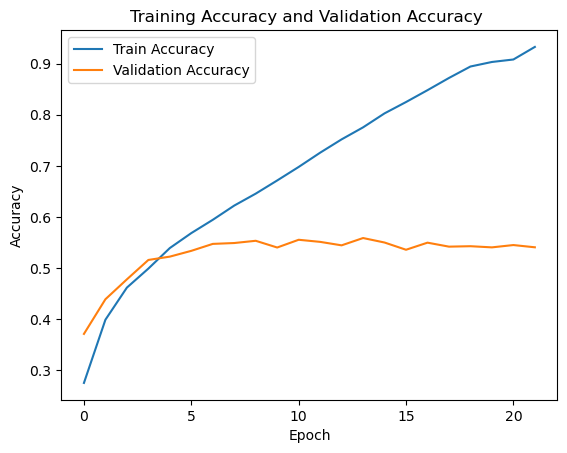

In [17]:
# Plot training accuracy and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy']) 
plt.title('Training Accuracy and Validation Accuracy ')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

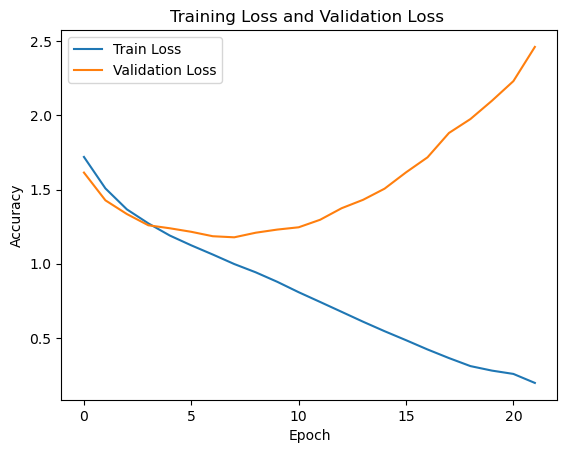

In [22]:
# Plot training accuracy and validation accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']) 
plt.title('Training Loss and Validation Loss ')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train Loss', 'Validation Loss'], loc='upper left')
plt.show()

In [23]:
model.save('model_include_disgust_3 CNN layers .h5')